# Functions

In the previous chapter we used several functions provided by Python, like `int` and `float`, and a few provided by the `math` module, like `sqrt` and `pow`.
In this chapter, you will learn how to create your own functions and run them.
And we'll see how one function can call another.
As examples, we'll display lyrics from Monty Python songs.
These silly examples demonstrate an important feature -- the ability to write your own functions is the foundation of programming.

This chapter also introduces a new statement, the `for` loop, which is used to repeat a computation.

In [4]:
# %pip install matplotlib.  ### Uncomment this line if matplotlib is not installed.
                            ### comment it out once matplotlib is installed.
import thinkpython, diagram, jupyturtle

```{index} function: built-in
```
## Python Built-iin Functions

```{figure} ../images/python-builtin-functions.png
---
width: 400px
name: python-builtin-functions
---
[Python Built-In Functions](https://docs.python.org/3/library/functions.html#built-in-functions)
```

The Python built-in functions can be grouped by their purposes as:

| Group                           | Functions                                                                                                                          | Notes                                                            |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- |
| Numbers & math                  | `abs`, `divmod`, `max`, `min`, `pow`, `round`, `sum`                                                                               | `pow(a, b, mod=None)` supports modular exponentiation.           |
| Type constructors/conversions | **`bool`**, **`int`**, **`float`**, `complex`, **`str`**, `bytes`, `bytearray`, `memoryview`, **`list`**, `tuple`, `set`, `frozenset`, `dict`, `range` | Convert or construct core types.                                 |
| Object/attribute introspection  | `type`, `isinstance`, `issubclass`, `id`, `hash`, `dir`, `vars`, `repr`, `ascii`                                                   | `vars(obj)` → `obj.__dict__` when available.                     |
| Attribute access                | `getattr`, `setattr`, `delattr`, `hasattr`                                                                                         | Dynamic attribute management.                                    |
| Iteration & functional tools    | `iter`, `next`, **`enumerate`**, `zip`, `map`, `filter`, `sorted`, `reversed`                                                          | Prefer comprehensions when clearer.                              |
| Sequence/char helpers           | `len`, `ord`, `chr`, `slice`                                                                                                       | `len()` works on many containers.                                |
| I/O                             | `print`, `input`, `open`                                                                                                           | `open` returns a context manager; prefer `with open(...) as f:`. |
| Formatting / representation     | `format`, `bin`, `oct`, `hex`                                                                                                      | Also see f-strings for formatting.                               |
| Object model (OOP helpers)      | `object`, `property`, `classmethod`, `staticmethod`, `super`                                                                       | Define descriptors and class behaviors.                          |
| Execution / metaprogramming     | `compile`, `eval`, `exec`                                                                                                          | Use with care; security concerns for untrusted input.            |
| Environment / namespaces        | `globals`, `locals`                                                                                                                | Introspection of current namespaces.                             |
| Help/debugging                  | `help`, `breakpoint`                                                                                                               | `breakpoint()` respects `PYTHONBREAKPOINT`.                      |
| Import                          | `__import__`                                                                                                                       | Low-level import; usually use `import` statement instead.        |

The Python interpreter has a number of functions and types built into it that are always available. Built-iin functions come prepackaged with the language and are ready-to-use, so you don’t need to import any modules to access them. Built-in functions represent the essential capabilities of the programming language such as:
- working with data types 
- performing calculations 
- handling input/output  

Some examples of built-in functions are: 
- `print()`) for displaying output) 
- `len()` for finding the length of a sequence 
- `type()` for checking the data type of a value 
- `range()` for generating sequences of numbers 
- `input()` for reading user input

```{index} print
```
### The print function

When you evaluate an expression, the result is displayed.

In [13]:
n = 17
n + 1

18

But if you evaluate more than one expression, only the value of the last one is displayed.

In [14]:
n + 2
n + 3

20

To display more than one value, you can use the `print` function.

In [15]:
print(n+2)
print(n+3)

19
20


It also works with floating-point numbers and strings.

In [16]:
import math

print('The value of pi is approximately')
print(math.pi)

The value of pi is approximately
3.141592653589793


You can also use a sequence of expressions separated by commas.

In [17]:
print('The value of pi is approximately', math.pi)

The value of pi is approximately 3.141592653589793


Notice that the `print` function puts a space between the values.

```{index} argument
```
### Arguments

When you call a function, the `expression` in parentheses is called an **{index}argument**.

Some of the functions we've seen so far take only one argument, like `int`.

In [18]:
int('101')

101

Some take two, like `math.pow`.

In [19]:
math.pow(5, 2)

25.0

Some can take additional arguments that are optional. 
For example, `int` can take a second argument that specifies the base of the number.

In [20]:
int('101', 2)

5

The sequence of digits `101` in base 2 represents the number 5 in base 10.

`round` also takes an optional second argument, which is the number of decimal places to round off to.

In [21]:
round(math.pi, 3)

3.142

Some functions can take any number of arguments, like `print`.

In [22]:
print('Any', 'number', 'of', 'arguments')

Any number of arguments


If you call a function and provide too many arguments, that's a `TypeError`.

In [23]:
%%expect TypeError

float('123.0', 2)

TypeError: float expected at most 1 argument, got 2

If you provide too few arguments, that's also a `TypeError`.

In [24]:
%%expect TypeError

math.pow(2)

TypeError: pow expected 2 arguments, got 1

And if you provide an argument with a type the function can't handle, that's a `TypeError`, too.

In [25]:
%%expect TypeError

math.sqrt('123')

TypeError: must be real number, not str

This kind of checking can be annoying when you are getting started, but it helps you detect and correct errors.

```{index} function: defining
```
## Defining new functions

### Why custom functions?

It may not be clear yet why it is worth the trouble to divide a program into
functions.
There are several reasons:

-   Creating a new function gives you an opportunity to name a group of
    statements, which makes your program easier to read and debug.

-   Functions can make a program smaller by eliminating repetitive code.
    Later, if you make a change, you only have to make it in one place.

-   Dividing a long program into functions allows you to debug the parts
    one at a time and then assemble them into a working whole.

-   Well-designed functions are often useful for many programs. Once you
    write and debug one, you can reuse it.

A **function definition** specifies the name of a new function and the sequence of statements that run when the function is called. Here's an example:

In [26]:
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print("I sleep all night and I work all day.")

`def` is a keyword that indicates that this is a function definition.
The name of the function is `print_lyrics`.
Anything that's a legal variable name is also a legal function name.

The empty parentheses after the name indicate that this function doesn't take any arguments.

The first line of the function definition is called the **header** -- the rest is called the **body**.
The header has to end with a colon and the body has to be indented. By convention, indentation is always four spaces. 
The body of this function is two print statements; in general, the body of a function can contain any number of statements of any kind.

Defining a function creates a **function object**, which we can display like this.

In [27]:
print_lyrics

<function __main__.print_lyrics()>

The output indicates that `print_lyrics` is a function that takes no arguments.
`__main__` is the name of the module that contains `print_lyrics`.

Now that we've defined a function, we can call it the same way we call built-in functions.

In [28]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


When the function runs, it executes the statements in the body, which display the first two lines of "The Lumberjack Song".

### Parameters

Some of the functions we have seen require arguments; for example, when you call `abs` you pass a number as an argument.
Some functions take more than one argument; for example, `math.pow` takes two, the base and the exponent.

Here is a definition for a function that takes an argument.

In [29]:
def print_twice(string):
    print(string)
    print(string)

The variable name in parentheses is a **parameter**.
When the function is called, **the value of the argument is assigned to the parameter**.
For example, we can call `print_twice` like this.

In [30]:
print_twice('Dennis Moore, ')

Dennis Moore, 
Dennis Moore, 


Running this function has the same effect as assigning the argument to the parameter and then executing the body of the function, like this.

In [31]:
string = 'Dennis Moore, '
print(string)
print(string)

Dennis Moore, 
Dennis Moore, 


You can also use a variable as an argument.

In [32]:
line = 'Dennis Moore, '
print_twice(line)

Dennis Moore, 
Dennis Moore, 


In this example, the value of `line` gets assigned to the parameter `string`.

```{index} variable: local 
```
### Variables and parameters are local

When you create a variable inside a function, it is **local**, which
means that it only exists inside the function.
For example, the following function takes two arguments, concatenates them, and prints the result twice.

In [ ]:
def cat_twice(part1, part2):
    cat = part1 + part2
    print_twice(cat)

Here's an example that uses it:

In [7]:
line1 = 'Always look on the '
line2 = 'bright side of life.'
cat_twice(line1, line2)

NameError: name 'cat_twice' is not defined

When `cat_twice` runs, it creates a local variable named `cat`, which is destroyed when the function ends.
If we try to display it, we get a `NameError`:

In [6]:
%%expect NameError

print(cat)

NameError: name 'cat' is not defined

Outside of the function, `cat` is not defined. 

Parameters are also local.
For example, outside `cat_twice`, there is no such thing as `part1` or `part2`.

```{index} function: calling
```
## Calling functions

Once you have defined a function, you can use it inside another function.
To demonstrate, we'll write functions that print the lyrics of "The Spam Song" (<https://www.songfacts.com/lyrics/monty-python/the-spam-song>).

> Spam, Spam, Spam, Spam,  
> Spam, Spam, Spam, Spam,  
> Spam, Spam,  
> (Lovely Spam, Wonderful Spam!)  
> Spam, Spam,

We'll start with the following function, which takes two parameters.


In [33]:
def repeat(word, n):
    print(word * n)

We can use this function to print the first line of the song, like this.

In [34]:
spam = 'Spam, '
repeat(spam, 4)

Spam, Spam, Spam, Spam, 


To display the first two lines, we can define a new function that uses `repeat`.

In [35]:
def first_two_lines():
    repeat(spam, 4)
    repeat(spam, 4)

And then call it like this.

In [36]:
first_two_lines()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 


To display the last three lines, we can define another function, which also uses `repeat`.

In [37]:
def last_three_lines():
    repeat(spam, 2)
    print('(Lovely Spam, Wonderful Spam!)')
    repeat(spam, 2)

In [38]:
last_three_lines()

Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


Finally, we can bring it all together with one function that prints the whole verse.

In [39]:
def print_verse():
    first_two_lines()
    last_three_lines()

In [40]:
print_verse()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


When we run `print_verse`, it calls `first_two_lines`, which calls `repeat`, which calls `print`.
That's a lot of functions.

Of course, we could have done the same thing with fewer functions, but the point of this example is to show how functions can work together.

```{index} repetition, for loop
```
## Repetition

If we want to display more than one verse, we can use a `for` statement.
Here's a simple example.

In [41]:
for i in range(2):
    print(i)

0
1


The first line is a header that ends with a colon.
The second line is the body, which has to be indented.

The header starts with the keyword `for`, a new variable named `i`, and another keyword, `in`. 
It uses the `range` function to create a sequence of two values, which are `0` and `1`.
In Python, when we start counting, we usually start from `0`.

When the `for` statement runs, it assigns the first value from `range` to `i` and then runs the `print` function in the body, which displays `0`.

When it gets to the end of the body, it loops back around to the header, which is why this statement is called a **loop**.
The second time through the loop, it assigns the next value from `range` to `i`, and displays it.
Then, because that's the last value from `range`, the loop ends.

Here's how we can use a `for` loop to print two verses of the song.

In [42]:
for i in range(2):
    print("Verse", i)
    print_verse()
    print()

Verse 0
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 

Verse 1
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 



You can put a `for` loop inside a function.
For example, `print_n_verses` takes a parameter named `n`, which has to be an integer, and displays the given number of verses. 

In [43]:
def print_n_verses(n):
    for i in range(n):
        print_verse()
        print()

In this example, we don't use `i` in the body of the loop, but there has to be a variable name in the header anyway.

## Internal working

A Python program begins as a plain text file created in a code editor and saved with a .py extension. When run, the Python interpreter reads the source code, checks its structure, and executes it in a step-by-step manner. This involves lexical analysis, parsing, and then running the instructions. Optionally, Python also compiles the code into **bytecode** to speed up execution. The interpreter then works like a virtual machine, translating that bytecode into low-level instructions (machine-specific binary code) that the computer can understand and execute.

```{figure} ../images/how-python-works.png
---
width: 350px
name: how-python-works
---

How Python Programs Work ([dev.to](https://dev.to/yaswanthteja/internals-of-python-11ed))



When Python processes source code and compiles it into bytecode, it moves through several stages:

- Tokenizing: The code is broken into tokens (identifiers, keywords, operators, etc.).
- Parsing: The tokens are checked to ensure they follow Python’s syntax rules, forming a syntax tree.
- Syntax Check: Validates that the code is free of syntax errors.
- Control Flow Graph (CFG): A structure is created to represent the possible execution paths of the program.
- Compilation: The validated and analyzed code is compiled into bytecode, a platform-independent, lower-level representation.
- Bytecode Generation: Produces the final bytecode instructions to be executed by the Python Virtual Machine (PVM).
- Storage: The resulting bytecode is often stored in .pyc files inside the \__pycache\__ directory for faster execution in future runs.

### Memory During Execution

Python creates and manages memory using:

| Memory Area           | Stores                                 |
| --------------------- | -------------------------------------- |
| **Stack**             | Function calls and local variables     |
| **Heap**              | Objects, lists, dicts, class instances |
| **Global Frame**      | Global variables, function names       |
| **Garbage Collector** | Frees unused objects                   |


```{index} stack diagram
```
#### Stack diagrams

A **stack** diagram in Python is a visual representation of the program's **execution state**, which includes function call management and the names of variables. To keep track of which variables can be used where, it is sometimes useful to draw a **stack diagram**. Like state diagrams, stack diagrams show the value of each variable, but they also show the function each variable belongs to.

Each function is represented by a **frame**. A frame is a box with the name of a function on the outside and the parameters and local variables of the function on the inside. Here's the stack diagram for the previous example.

In [47]:
from diagram import make_frame, Stack

d1 = dict(line1=line1, line2=line2)
frame1 = make_frame(d1, name='__main__', dy=-0.3, loc='left')

d2 = dict(part1=line1, part2=line2, cat=line1+line2)
frame2 = make_frame(d2, name='cat_twice', dy=-0.3, 
                    offsetx=0.03, loc='left')

d3 = dict(string=line1+line2)
frame3 = make_frame(d3, name='print_twice', 
                    offsetx=0.04, offsety=-0.3, loc='left')

d4 = {"?": line1+line2}
frame4 = make_frame(d4, name='print', 
                    offsetx=-0.22, offsety=0, loc='left')

stack = Stack([frame1, frame2, frame3, frame4], dy=-0.8)

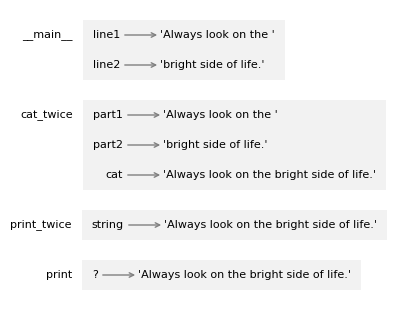

In [48]:
from diagram import diagram, adjust


width, height, x, y = [3.77, 2.9, 1.1, 2.65]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

import matplotlib.pyplot as plt
plt.savefig('chap03_stack_diagram.png', dpi=300)

The frames are arranged in a stack that indicates which function called
which, and so on. Reading from the bottom, `print` was called by `print_twice`, which was called by `cat_twice`, which was called by `__main__` -- which is a special name for the topmost frame.
When you create a variable outside of any function, it belongs to `__main__`.

In the frame for `print`, the question mark indicates that we don't know the name of the parameter.
If you are curious, ask a virtual assistant, "What are the parameters of the Python print function?"

### Tracebacks

A traceback is a detailed log that Python prints when it encounters an exception. It lists the sequence of function calls that led to the error. 

When a runtime error occurs in a function, Python displays the name of the function that was running, the name of the function that called it, and so on, up the stack.
To illustrate, let's define a version of `print_twice` that contains an error -- it attempts to print `cat`, which is a local variable in another function.

In [14]:
def print_twice(string):
    print(cat)            
    print(cat)

Now here's what happens when we run `cat_twice`.

In [50]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs, including a traceback.

%xmode Verbose

Exception reporting mode: Verbose


In [13]:
%%expect NameError

cat_twice(line1, line2)

NameError: name 'cat_twice' is not defined

The error message includes a **traceback**, which is the error report you see when your program encounters an error and crashes. It shows 1) where the error occurred, 2) which **lines** were executed, and 3) what **type of error** happened. In this example, it shows that `cat_twice` called `print_twice`, and the error occurred in `print_twice`.

The order of the functions in the traceback is the same as the order of the frames in the stack diagram: you read it from **bottom to top**. For the traceback above, we have:

- The error at the bottom: The error type and message (NameError: name 'cat' is not defined).
- Above that: The line where the error actually happened (line 2 in `print_twice()` when executing `print(cat)`).
- Above that: The chain of calls that led there.

**Common Error Types Seen in Tracebacks**

| Error         | Example Cause                       |
| ------------- | ----------------------------------- |
| `SyntaxError` | Typing error in code structure      |
| `TypeError`   | Wrong type of data for an operation |
| `NameError`   | Using a variable that doesn’t exist |
| `IndexError`  | Index out of list range             |
| `KeyError`    | Dictionary key not found            |
| `ValueError`  | Correct type but invalid value      |


## Debugging

Debugging can be frustrating, but it is also challenging, interesting, and sometimes even fun.
And it is one of the most important skills you can learn.

In some ways debugging is like detective work.
You are given clues and you have to infer the events that led to the
results you see.

Debugging is also like experimental science.
Once you have an idea about what is going wrong, you modify your program and try again.
If your hypothesis was correct, you can predict the result of the modification, and you take a step closer to a working program.
If your hypothesis was wrong, you have to come up with a new one.

For some people, programming and debugging are the same thing; that is, programming is the process of gradually debugging a program until it does what you want.
The idea is that you should start with a working program and make small modifications, debugging them as you go.

If you find yourself spending a lot of time debugging, that is often a sign that you are writing too much code before you start tests.
If you take smaller steps, you might find that you can move faster.

## Glossary

```{glossary}

**function definition**
 A statement that creates a function.

**header**
 The first line of a function definition.

**body**
 The sequence of statements inside a function definition.

**function object**
 A value created by a function definition. The name of the function is a variable that refers to a function object.

**parameter**
 A name used inside a function to refer to the value passed as an argument.

**loop**
 A statement that runs one or more statements, often repeatedly.

**local variable**
 A variable defined inside a function, and which can only be accessed inside the function.

**stack diagram**
 A graphical representation of a stack of functions, their variables, and the values they refer to.

**frame**
 A box in a stack diagram that represents a function call.
 It contains the local variables and parameters of the function.

**traceback**
 A list of the functions that are executing, printed when an exception occurs.
```

## Exercises

In [52]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

The statements in a function or a `for` loop are indented by four spaces, by convention.
But not everyone agrees with that convention.
If you are curious about the history of this great debate, ask a virtual assistant to "tell me about spaces and tabs in Python".

Virtual assistant are pretty good at writing small functions.

1. Ask your favorite VA to "Write a function called repeat that takes a string and an integer and prints the string the given number of times." 

2. If the result uses a `for` loop, you could ask, "Can you do it without a for loop?"

3. Pick any other function in this chapter and ask a VA to write it. The challenge is to describe the function precisely enough to get what you want. Use the vocabulary you have learned so far in this book.

Virtual assistants are also pretty good at debugging functions.

1. Ask a VA what's wrong with this version of `print_twice`.

    ```
    def print_twice(string):
        print(cat)
        print(cat)
    ```
    
And if you get stuck on any of the exercises below, consider asking a VA for help.

### Exercise

Write a function named `print_right` that takes a string named `text` as a parameter and prints the string with enough leading spaces that the last letter of the string is in the 40th column of the display.

In [53]:
# Solution goes here

Hint: Use the `len` function, the string concatenation operator (`+`) and the string repetition operator (`*`).

Here's an example that shows how it should work.

In [54]:
print_right("Monty")
print_right("Python's")
print_right("Flying Circus")

NameError: name 'print_right' is not defined

### Exercise

Write a function called `triangle` that takes a string and an integer and draws a pyramid with the given height, made up using copies of the string. Here's an example of a pyramid with `5` levels, using the string `'L'`.

In [ ]:
# Solution goes here

In [ ]:
triangle('L', 5)

### Exercise

Write a function called `rectangle` that takes a string and two integers and draws a rectangle with the given width and height, made up using copies of the string. Here's an example of a rectangle with width `5` and height `4`, made up of the string `'H'`.

In [ ]:
# Solution goes here

In [ ]:
rectangle('H', 5, 4)

### Exercise

The song "99 Bottles of Beer" starts with this verse:

> 99 bottles of beer on the wall  
> 99 bottles of beer  
> Take one down, pass it around  
> 98 bottles of beer on the wall  

Then the second verse is the same, except that it starts with 98 bottles and ends with 97. The song continues -- for a very long time -- until there are 0 bottles of beer.

Write a function called `bottle_verse` that takes a number as a parameter and displays the verse that starts with the given number of bottles.

Hint: Consider starting with a function that can print the first, second, or last line of the verse, and then use it to write `bottle_verse`.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

Use this function call to display the first verse.

In [ ]:
bottle_verse(99)

If you want to print the whole song, you can use this `for` loop, which counts down from `99` to `1`.
You don't have to completely understand this example---we'll learn more about `for` loops and the `range` function later.

In [ ]:
for n in range(99, 0, -1):
    bottle_verse(n)
    print()